<a href="https://colab.research.google.com/github/orinbou/CalcDaytime/blob/main/%E6%97%A5%E3%81%AE%E5%87%BA%E5%85%A5%E3%81%AE%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日の出・日の入の計算

国立天文台の情報

https://eco.mtk.nao.ac.jp/koyomi/dni/2024/s1504.html

によると本日（4/6）の日の出、日の入は次のとおり

* 日の出 05:21
* 日の入 18:07

となっており【日の出】【日の入】ともに時間に1分強のズレが発生している。

In [ ]:
# https://qiita.com/Radley/items/9f05251c6fcbd3e4f547
import shutil

#directory = '/content/drive/MyDrive/Colab Notebooks/my-modules'

try:
    shutil.rmtree(directory)
except FileNotFoundError:
    pass

## Skyfield

https://www.sci-museum.kita.osaka.jp/~egoshi/astronomy/python/python_skyfield.html

https://rhodesmill.org/skyfield/

In [ ]:
#!pip install skyfield
!pip install --target "/content/drive/MyDrive/Colab Notebooks/my-modules" skyfield

  Using cached skyfield-1.48-py3-none-any.whl (453 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached jplephem-2.21-py3-none-any.whl (47 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached sgp4-2.23-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (232 kB)


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')

from skyfield.api import load, Topos
from skyfield.almanac import find_discrete, sunrise_sunset
from datetime import timedelta
from pytz import timezone

ts = load.timescale()
eph = load('de421.bsp')

today = ts.now()
yesterday = ts.utc(today.utc_datetime() - timedelta(days=1))
tz = timezone('Asia/Tokyo')

print('なう！:', today.astimezone(tz).strftime('%Y-%m-%d %H:%M:%S'))

point = Topos('35.4500 N', '139.6500 E') # 横浜（神奈川）@国立天文台

t, updown = find_discrete(yesterday, today, sunrise_sunset(eph, point))

for yi, ti in zip(updown, t):
    print('日の出:' if yi else '日の入:', ti.astimezone(tz).strftime('%Y-%m-%d %H:%M:%S'), 'JST')

[#################################] 100% de421.bsp


なう！: 2024-04-07 10:23:33
日の入: 2024-04-06 18:07:00 JST
日の出: 2024-04-07 05:19:43 JST


国立天文台の情報

https://eco.mtk.nao.ac.jp/koyomi/dni/2024/s1504.html

によると本日（4/6）の日の出、日の入は次のとおり

* 日の出 05:21
* 日の入 18:07

となっており【日の入】の時間に1分弱のズレが発生している。

=> 精度【★★☆】

* 実行結果
> なう！: 2024-04-06 16:46:25  
> 日の出: 2024-04-06 05:21:06 JST  
> 日の入: 2024-04-05 18:06:11 JST  

## PyEphem

http://www.sci-museum.kita.osaka.jp/~egoshi/astronomy/python/python.html

https://rhodesmill.org/pyephem/

In [ ]:
!pip install ephem
#!pip install --target "/content/drive/MyDrive/Colab Notebooks/my-modules" ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')

import ephem
import datetime
from pytz import timezone

point = ephem.Observer()
point.lat = '35.4500'  # 横浜（神奈川）@国立天文台
point.lon = '139.6500' # 横浜（神奈川）@国立天文台
point.date = datetime.datetime.utcnow()
#point.date = datetime.datetime(year=2024, month=4, day=6)
tz = timezone('Asia/Tokyo')

sun = ephem.Sun()

print('なう！:', ephem.localtime(point.date).astimezone(tz).strftime('%Y-%m-%d %H:%M:%S'))
print('日の出:', ephem.localtime(point.previous_rising(sun)).astimezone(tz).strftime('%Y-%m-%d %H:%M:%S'))
print('日の入:', ephem.localtime(point.next_setting(sun)).astimezone(tz).strftime('%Y-%m-%d %H:%M:%S'))

なう！: 2024-04-07 10:25:18
日の出: 2024-04-07 05:19:28
日の入: 2024-04-07 18:08:05


国立天文台の情報

https://eco.mtk.nao.ac.jp/koyomi/dni/2024/s1504.html

によると本日（4/6）の日の出、日の入は次のとおり

* 日の出 05:21
* 日の入 18:07

となっており概ね時間が一致している。

=> 精度【★★★】

* 実行結果
> なう！: 2024-04-06 16:56:25  
> 日の出: 2024-04-06 05:20:50  
> 日の入: 2024-04-06 18:07:16  

# Mercury Cloud

https://runmercury.com/docs/cloud/

https://qiita.com/DoroDango/items/269c74d091ef6b94b9ab

In [ ]:
!pip install -r requirements.txt

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-07, 05:19:27, 18:08:05, 12:48:37.169277)

日の出【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-13, 4.422937134444444, 18.962846245277778, 14.539909110833333)
日の出【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-01-08, 6.8461861794444445, 16.747240094722223, 9.901053915277776)

日の入【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-05, 6.587266166666667, 16.47752939777778, 9.890263231111112)
日の入【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-29, 4.479306798888889, 19.015874062222224, 14.536567263333332)

日中長【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-21, 6.771982281111111, 16.54457454888889, 9.772592267777778)
日中長【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-21, 4.438199931111112, 19.00300006638889, 14.564800135277778)



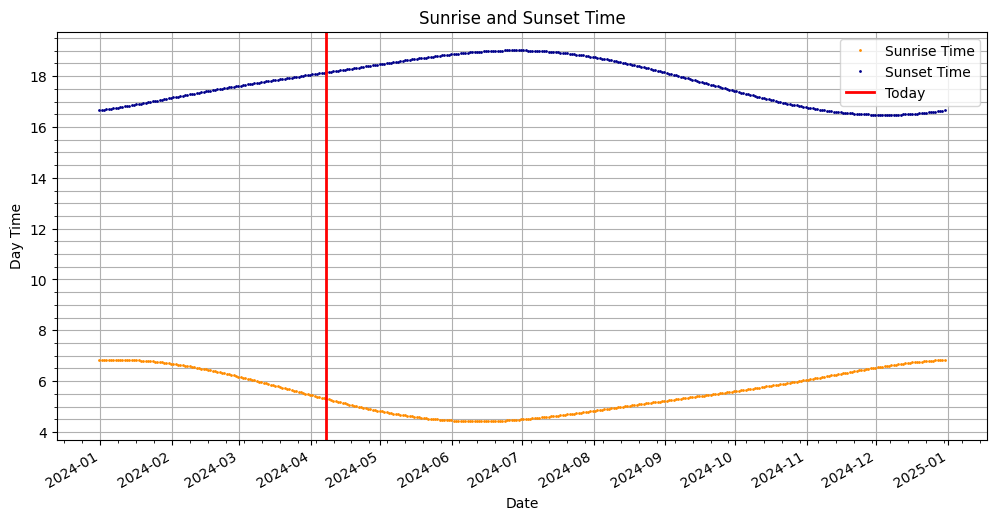

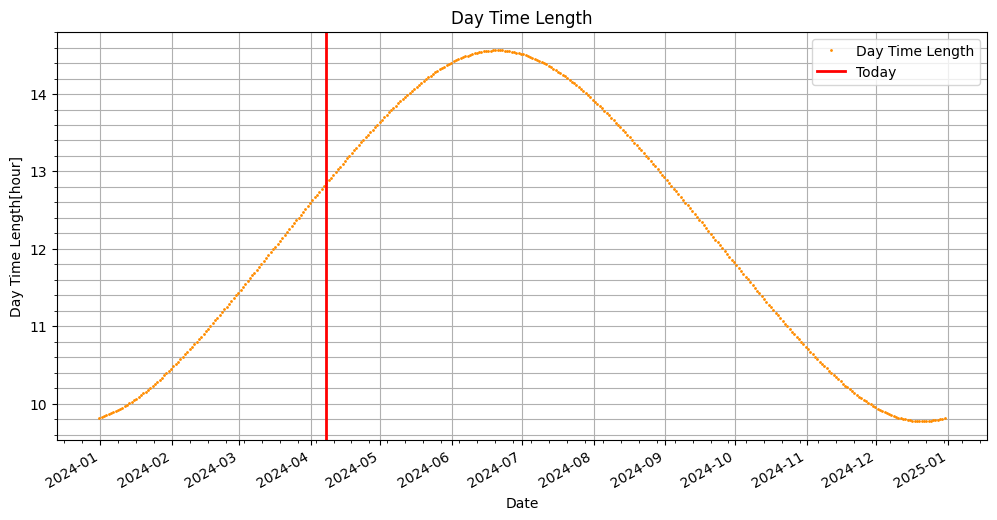

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')

import ephem
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
from matplotlib import ticker

point = ephem.Observer()
point.lat = '35.4500'  # 横浜（神奈川）@国立天文台
point.lon = '139.6500' # 横浜（神奈川）@国立天文台

sf_ymd = '%Y-%m-%d'
sf_HMS = '%H:%M:%S'

tz = timezone('Asia/Tokyo')
now = datetime.datetime.utcnow()
today_str = now.astimezone(tz).strftime(sf_ymd)

x_dates = []
y_sr_times = []
y_ss_times = []
y_day_times = []

start_year = now.astimezone(tz).year
date = datetime.datetime(year=start_year, month=1, day=1)

for i in range(366):
    point.date = date
    sun = ephem.Sun()
    dt0jst = datetime.datetime(year=date.year, month=date.month, day=date.day, tzinfo=datetime.timezone(datetime.timedelta(hours=+9)))
    dt1jst = ephem.localtime(point.previous_rising(sun)).astimezone(tz)
    dt2jst = ephem.localtime(point.next_setting(sun)).astimezone(tz)
    day = dt2jst - dt1jst

    x_dates.append(dt0jst)
    y_sr_times.append((dt1jst - dt0jst).total_seconds() / 60 / 60)
    y_ss_times.append((dt2jst - dt0jst).total_seconds() / 60 / 60)
    y_day_times.append(day.total_seconds() / 60 / 60)

    dt0str = dt0jst.strftime(sf_ymd)
    dt1str = dt1jst.strftime(sf_HMS)
    dt2str = dt2jst.strftime(sf_HMS)
    # for DEBUG
    #print(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})')
    if dt0str == today_str:
       print(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})\n')

    date += datetime.timedelta(days=1)

# 日の出：Min/Max
idx = y_sr_times.index(min(y_sr_times))
print(f'日の出【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_sr_times.index(max(y_sr_times))
print(f'日の出【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# 日の入：Min/Max
idx = y_ss_times.index(min(y_ss_times))
print(f'日の入【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_ss_times.index(max(y_ss_times))
print(f'日の入【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# 日中の長さ：Min/Max
idx = y_day_times.index(min(y_day_times))
print(f'日中長【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_day_times.index(max(y_day_times))
print(f'日中長【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# グラフ描画（日の出、日の入の時刻）
plt.figure(figsize=[12, 6])
plt.plot_date(x_dates, y_sr_times, markersize=1, color='darkorange')
plt.plot_date(x_dates, y_ss_times, markersize=1, color='darkblue')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Sunrise and Sunset Time")
plt.xlabel("Date")
plt.ylabel("Day Time")
plt.legend(['Sunrise Time', 'Sunset Time', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# グラフ描画（日中の長さ）
plt.figure(figsize=[12, 6])
plt.plot_date(x_dates, y_day_times, markersize=1, color='darkorange')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Day Time Length")
plt.xlabel("Date")
plt.ylabel("Day Time Length[hour]")
plt.legend(['Day Time Length', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()


In [ ]:
!pip install mercury
#!pip install --target "/content/drive/MyDrive/Colab Notebooks/my-modules" mercury

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.0/422.0 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 

mercury.App

**Markdownの記法は普通に使えます。例えば、こう書けば太字になります**

**Markdownの記法は普通に使えます。例えば、こう書けば太字になります**

mercury.Select

mercury.Numeric

mercury.Numeric

(日付, 日の出, 日の入, 日中長[時間]) = (2024-04-07, 05:19:27, 18:08:05, 12:48:37.169277)

日の出【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-13, 4.422937134444444, 18.962846245277778, 14.539909110833333)
日の出【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-01-08, 6.8461861794444445, 16.747240094722223, 9.901053915277776)

日の入【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-05, 6.587266166666667, 16.47752939777778, 9.890263231111112)
日の入【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-29, 4.479306798888889, 19.015874062222224, 14.536567263333332)

日中長【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-21, 6.771982281111111, 16.54457454888889, 9.772592267777778)
日中長【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-21, 4.438199931111112, 19.00300006638889, 14.564800135277778)



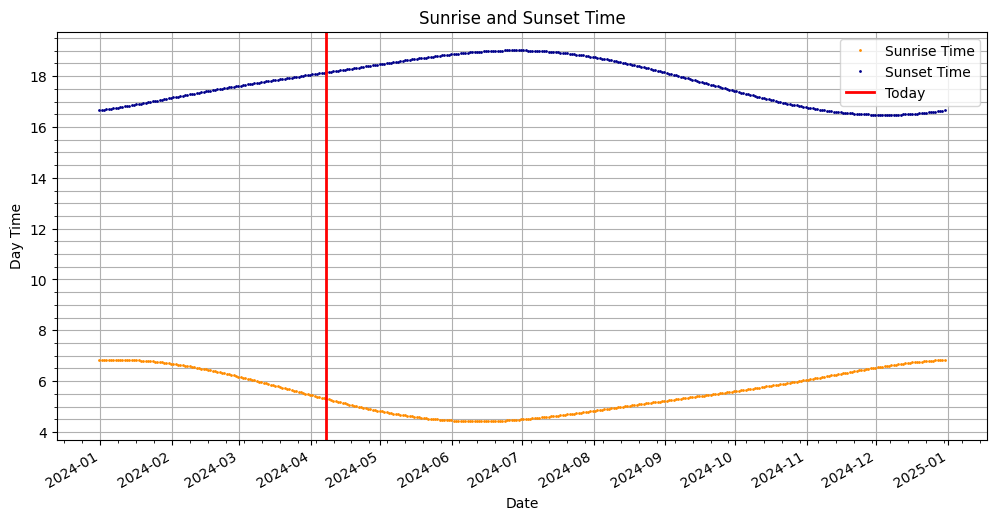

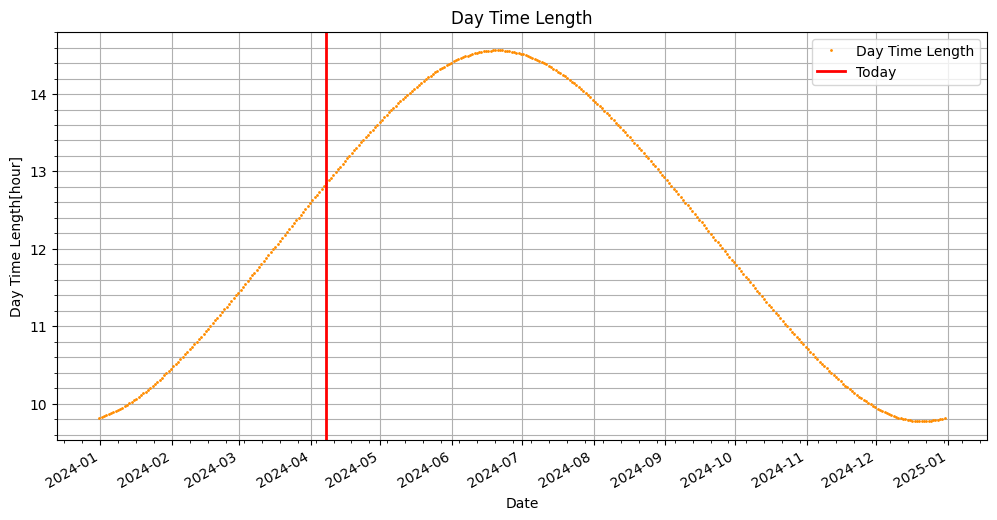

In [ ]:
import mercury as mr
import ephem
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
from matplotlib import ticker

app = mr.App(
    title='アプリ名',
    description='アプリの概要説明',
    continuous_update=True,
    show_code=False,
)

mr.Note('**Markdownの記法は普通に使えます。例えば、こう書けば太字になります**')
mr.Md('**Markdownの記法は普通に使えます。例えば、こう書けば太字になります**')

sf_ymd = '%Y-%m-%d'
sf_HMS = '%H:%M:%S'

tz = timezone('Asia/Tokyo')
now = datetime.datetime.utcnow()
today_str = now.astimezone(tz).strftime(sf_ymd)

# 入力欄
select_year = mr.Select(value = str(now.astimezone(tz).year), choices = [str(now.astimezone(tz).year - 1), str(now.astimezone(tz).year), str(now.astimezone(tz).year + 1)], label = "西暦")
start_year = int(select_year.value)
number_lat = mr.Numeric(value=35.4500, min=0, max=180, step=0.1, label="緯度")
number_lon = mr.Numeric(value=139.6500, min=0, max=180, step=0.1, label="経度")

# 入力された値を取得
point = ephem.Observer()
point.lat = str(number_lat.value)
point.lon = str(number_lon.value)

x_dates = []
y_sr_times = []
y_ss_times = []
y_day_times = []

date = datetime.datetime(year=start_year, month=1, day=1)

for i in range(366):
    point.date = date
    sun = ephem.Sun()
    dt0jst = datetime.datetime(year=date.year, month=date.month, day=date.day, tzinfo=datetime.timezone(datetime.timedelta(hours=+9)))
    dt1jst = ephem.localtime(point.previous_rising(sun)).astimezone(tz)
    dt2jst = ephem.localtime(point.next_setting(sun)).astimezone(tz)
    day = dt2jst - dt1jst

    x_dates.append(dt0jst)
    y_sr_times.append((dt1jst - dt0jst).total_seconds() / 60 / 60)
    y_ss_times.append((dt2jst - dt0jst).total_seconds() / 60 / 60)
    y_day_times.append(day.total_seconds() / 60 / 60)

    dt0str = dt0jst.strftime(sf_ymd)
    dt1str = dt1jst.strftime(sf_HMS)
    dt2str = dt2jst.strftime(sf_HMS)
    # for DEBUG
    #print(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})')
    if dt0str == today_str:
       print(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})\n')

    date += datetime.timedelta(days=1)

# 日の出：Min/Max
idx = y_sr_times.index(min(y_sr_times))
print(f'日の出【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_sr_times.index(max(y_sr_times))
print(f'日の出【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# 日の入：Min/Max
idx = y_ss_times.index(min(y_ss_times))
print(f'日の入【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_ss_times.index(max(y_ss_times))
print(f'日の入【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# 日中の長さ：Min/Max
idx = y_day_times.index(min(y_day_times))
print(f'日中長【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
idx = y_day_times.index(max(y_day_times))
print(f'日中長【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]}, {y_ss_times[idx]}, {y_day_times[idx]})')
print('')

# グラフ描画（日の出、日の入の時刻）
plt.figure(figsize=[12, 6])
plt.plot_date(x_dates, y_sr_times, markersize=1, color='darkorange')
plt.plot_date(x_dates, y_ss_times, markersize=1, color='darkblue')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Sunrise and Sunset Time")
plt.xlabel("Date")
plt.ylabel("Day Time")
plt.legend(['Sunrise Time', 'Sunset Time', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# グラフ描画（日中の長さ）
plt.figure(figsize=[12, 6])
plt.plot_date(x_dates, y_day_times, markersize=1, color='darkorange')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Day Time Length")
plt.xlabel("Date")
plt.ylabel("Day Time Length[hour]")
plt.legend(['Day Time Length', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()


# Sunset and sunrise times API

In [ ]:
# -*- coding:utf-8 -*-
#各種libraryのインポート
import requests
import json
import datetime
from datetime import datetime, timezone, timedelta

# APIエンドポイント
sunset_url = "https://api.sunrise-sunset.org/json?lat={lat}&lng={lon}&date={date}&formatted=0"
#各種パラメータをセット
sunset_url = sunset_url.format(lat="35.4500", lon="139.6500", date="today") # 横浜（神奈川）@国立天文台
sunset_json = requests.get(sunset_url).json()

# ISO8601フォーマット => Datetime_awere(timezoneあり)
utc_sunrise = datetime.fromisoformat(sunset_json["results"]["sunrise"])
utc_sunset = datetime.fromisoformat(sunset_json["results"]["sunset"])

# timezone変更（UTC => JST）、表示フォーマットの変更
# 時刻フォーマット例；'%Y年%-m月%-d日 %-H時%-M分%-S秒'
JST = timezone(timedelta(hours=+9), "JST")
sunrise = utc_sunrise.astimezone(JST).strftime('%m/%d %H:%M:%S')
sunset = utc_sunset.astimezone(JST).strftime('%m/%d %H:%M:%S')

print('なう！:', datetime.now(JST).strftime('%Y-%m-%d %H:%M:%S'))
print("日の出 : " + sunrise)
print("日の入： " + sunset)

なう！: 2024-04-06 16:45:31
日の出 : 04/06 05:19:24
日の入： 04/06 18:08:08


国立天文台の情報

https://eco.mtk.nao.ac.jp/koyomi/dni/2024/s1504.html

によると本日（4/6）の日の出、日の入は次のとおり

* 日の出 05:21
* 日の入 18:07

となっており【日の出】【日の入】の時間が共に1分強のズレが発生している。

=> 精度【★☆☆】

* 実行結果
> なう！: 2024-04-06 16:45:31  
> 日の出 : 04/06 05:19:24  
> 日の入： 04/06 18:08:08  

# Googleの生成AIによるコーディングサンプル

In [ ]:
# prompt: 日本の横浜市の日の出の時刻を表示するプログラムを書いてください

import requests
import json
from datetime import datetime, timezone, timedelta

# APIエンドポイント
sunset_url = "https://api.sunrise-sunset.org/json?lat={lat}&lng={lon}&date={date}&formatted=0"

# 横浜市の緯度経度
lat = "35.4500"
lon = "139.6500"

# 日付を今日に設定
date = "today"

# APIリクエストを送信
sunset_json = requests.get(sunset_url.format(lat=lat, lon=lon, date=date)).json()

# 日の出時刻を取得
utc_sunrise = datetime.fromisoformat(sunset_json["results"]["sunrise"])

# タイムゾーンをJSTに変更
JST = timezone(timedelta(hours=+9), "JST")
sunrise = utc_sunrise.astimezone(JST)

# 日の出時刻を表示
print("日の出時刻:", sunrise.strftime('%H:%M:%S'))


日の出時刻: 05:19:24


In [ ]:
# prompt: 日本の横浜市の日の出と日の入りの時刻を表示するプログラムを書いてください

# APIエンドポイント
sunset_url = "https://api.sunrise-sunset.org/json?lat={lat}&lng={lon}&date={date}&formatted=0"

# 横浜市の緯度経度
lat = "35.4500"
lon = "139.6500"

# 日付を今日に設定
date = "today"

# APIリクエストを送信
sunset_json = requests.get(sunset_url.format(lat=lat, lon=lon, date=date)).json()

# 日の出時刻を取得
utc_sunrise = datetime.fromisoformat(sunset_json["results"]["sunrise"])

# 日の入時刻を取得
utc_sunset = datetime.fromisoformat(sunset_json["results"]["sunset"])

# タイムゾーンをJSTに変更
JST = timezone(timedelta(hours=+9), "JST")
sunrise = utc_sunrise.astimezone(JST)
sunset = utc_sunset.astimezone(JST)

# 日の出時刻と日の入時刻を表示
print("日の出時刻:", sunrise.strftime('%H:%M:%S'))
print("日の入時刻:", sunset.strftime('%H:%M:%S'))


日の出時刻: 05:19:24
日の入時刻: 18:08:08


## 参考

* Google Colab/Drive に pip インストール: これなら消えない

  https://ggcs.io/2020/06/22/google-colab-pip-install/

* 【Python】APIから日出、日没、薄明の時間を取得してみた

  https://qiita.com/Tatsuki_Yo/items/e831cfe8963c989da094

* Sunrise-Sunset (独立系発行者) (プレビュー)

  https://learn.microsoft.com/ja-jp/connectors/sunrisesunsetip/

* 円軌道の場合の解

  http://zakii.la.coocan.jp/physics/22_sunrise_circle.htm
